# Pobranie Danych i zrodla
# Diagnoza Guza Mozgu Przez Klasyfikacje

https://towardsdatascience.com/understanding-logistic-regression-step-by-step-704a78be7e0a

https://towardsdatascience.com/machine-learning-basics-logistic-regression-890ef5e3a272

# Parametry Data Set'u




Parametry Data Setu:


1. tumor radius (mean odleglosci od srodka do punktow na perimeter czyli obwodzie)

2. texture (standardowe odchylenie wartosci skali szarosci)
3. perimeter (obwod)
4. area
5. smoothness (lokalna zmiennosc w dlugosciach promienia)
6. compactness (perimeter² / area — 1.0)
7. concavity (ostrosc concave portions dla konturow)
8. concave points (liczba concave portions na konturze)
9. symmetry
10. fractal dimension

mean, standard error oraz “worst”(mean dla 3 najwiekszych wartosci) - dla tych parametrow tekstur zostaly policzone dla kazdego obrazka MRI-
dajac nam razem 30 wierszy - parametrow tekstur.






In [ ]:
import warnings
warnings.filterwarnings('ignore')



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

# Plik CSV z danymi medycznymi
df = pd.read_csv("https://raw.githubusercontent.com/kalash34/WizualizacjaDanych/main/Pliki/data.csv")


df.head()

df.columns

df.info()

# Pokaz nienazwane kolumny z df
# To sa takie ktore sie pojawiaja jak sa indeksy w dataframe bez indeksu ;q
#
df['Unnamed: 32']

# Usuwamy nienazwane wiersze z df

df = df.drop("Unnamed: 32", axis=1)

# Sprawdz czy te wartosci sa usuniete 
df.head()

df.columns
 
df.drop('id', axis=1, inplace=True)
# mozna rowniez df = df.drop('id', axis=1)

df.columns

type(df.columns)

l = list(df.columns)
print(l)


features_mean = l[1:11]
features_se = l[11:21]
features_worst = l[21:]

# Sprawdzamy pole Diagnozy
df['diagnosis'].unique()

df.shape
# Podsumowanie wartosci numerycznych
df.describe()


df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.head()
 
df['diagnosis'].unique()
 
X = df.drop('diagnosis', axis=1)
X.head()
 
y = df['diagnosis']
y.head()

# df.corr() zwraca nam kwadratowa macierz korelacji
# dla wszystkich kolumn - wartosci w polach mecierzy to wspolczynniki korelacji w przedziale [-1, 1]
# Elementy lezace na glownej przekatnej to 1 - stopien skorelowania zmiennej Xi ze soba sama

# Czyli tak jak na RPiS
# wspolczynniki to:

# r(X, Y) = cov(X, Y) / std_dev(X) + std_dev(Y)



corr = df.corr()


df






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Wykresy Dla Danych

[Text(0.5, 1.0, 'Liczba Pozytywnych Diagnoz')]

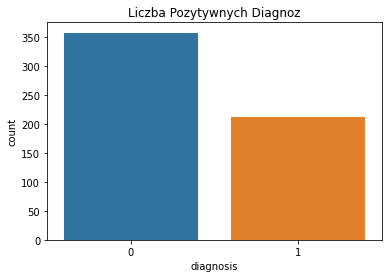

In [ ]:


# M - oznacza Malignant - Zlosliwy , B to Begin czyli poczatek

sns.countplot(df['diagnosis'], label="Liczba").set(title='Liczba Pozytywnych Diagnoz')


# plt.savefig('StosunekDiagnoz.png')



[Text(0.5, 1.0, 'Macierz Korelacji')]

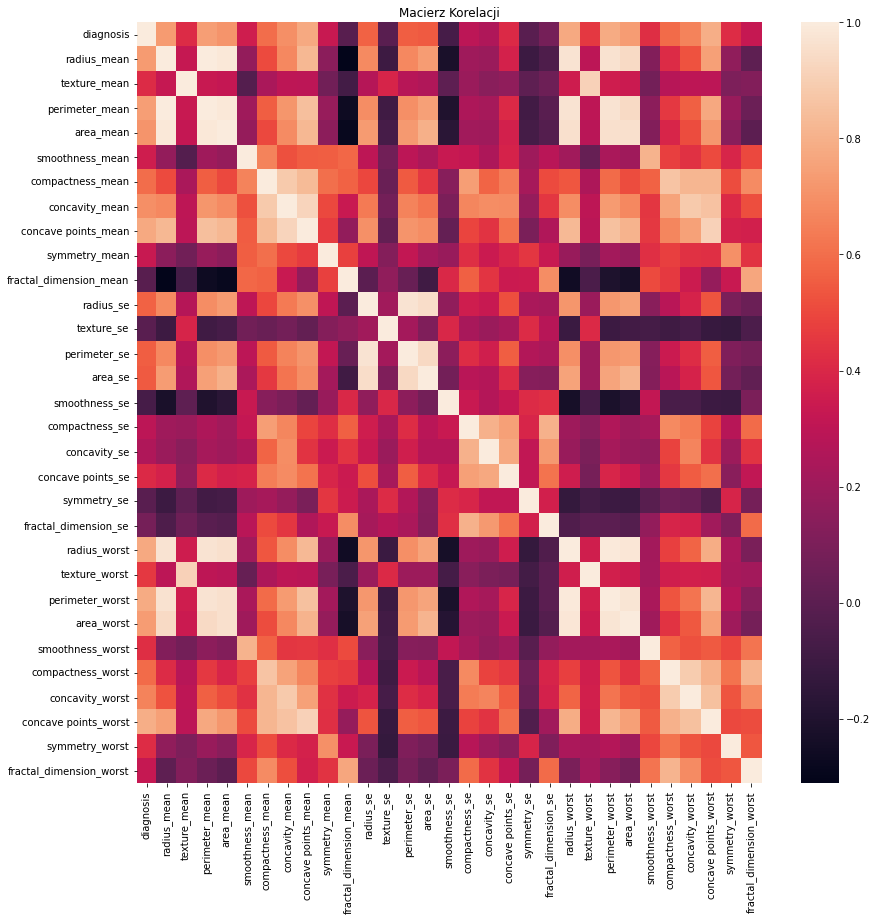

In [ ]:

# Mapa Ciepla Dla Macierzy korelacji

plt.figure(figsize=(14, 14))
sns.heatmap(corr).set(title="Macierz Korelacji")

# plt.savefig('MacierzKorelacji.png')


# Do listy parametrow guza mozgu zaliczaja sie punkty stale oraz punkty wklesle ( concave points ).
# Linia Stala oznacza margines obszaru guza ( np zlosliwego ), punkty wklesle polaczane sa linia

# Parametry z SE to Standard Error dla kazdego parametru tekstury guza na zdjeciu MRI
# 
#


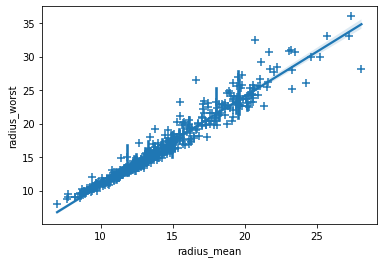

In [ ]:


ax = sns.regplot(x="radius_mean", y="radius_worst", data=df, marker="+",x_estimator=np.mean)

# Podzial na TRAIN SET i TEST SET

In [ ]:

# Podzielmy Dataset na train i test set
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
 
df.shape
# o/p: (569, 31)
 
X_train.shape
# o/p: (398, 30)
 
X_test.shape
# o/p: (171, 30)
 
y_train.shape
# o/p: (398,)
 
y_test.shape
# o/p: (171,)
 
X_train.head(1)

# Zwracamy topowe 5 wierszy (jesli istnieja)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
 
X_train

X_test



array([[-0.91979255, -1.47074264, -0.96665494, ..., -1.16229292,
        -0.29699197, -0.40080177],
       [ 0.11631343, -0.64408012,  0.12529343, ...,  0.42663038,
         0.24039431,  0.24505364],
       [ 0.81097539, -0.12222055,  0.77505847, ...,  0.52021573,
        -0.17416082, -0.67434757],
       ...,
       [-0.09267386,  0.34652943, -0.04411725, ...,  0.64811571,
         0.48435062,  1.88872274],
       [-0.62838774, -0.22613064, -0.59652476, ..., -0.00386224,
         0.82725424,  0.00622481],
       [ 2.70363488,  1.76432491,  2.67074262, ...,  2.26558254,
         0.32569372,  0.19297818]])

# Wykres Prognozy dla Zbioru Treningowego i Testowego

**Metoda Implementujaca Algorytm K Najblizszych sasiadow**
- uzywamy go do prognozowania wartosci zmiennej losowej-
Dla Danej Obserwacji C z wektorem zmiennych losowych =
[X1,X2,X3, .. Xn] Dla Ktorej Chcemy Prognozowac Wartosc
zmiennej Y.


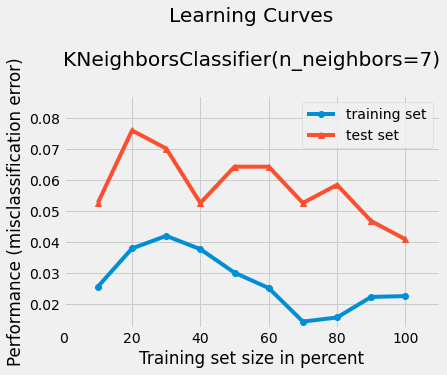

In [ ]:
from mlxtend.plotting import plot_learning_curves
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=7)

plot_learning_curves(X_train, y_train, X_test, y_test, clf)
plt.show()

# plt.savefig('KrzyweUczenia.png')



# Regresja Logistyczna

0.9532163742690059
Dokladnosc Przewidywania= 0.9532163742690059


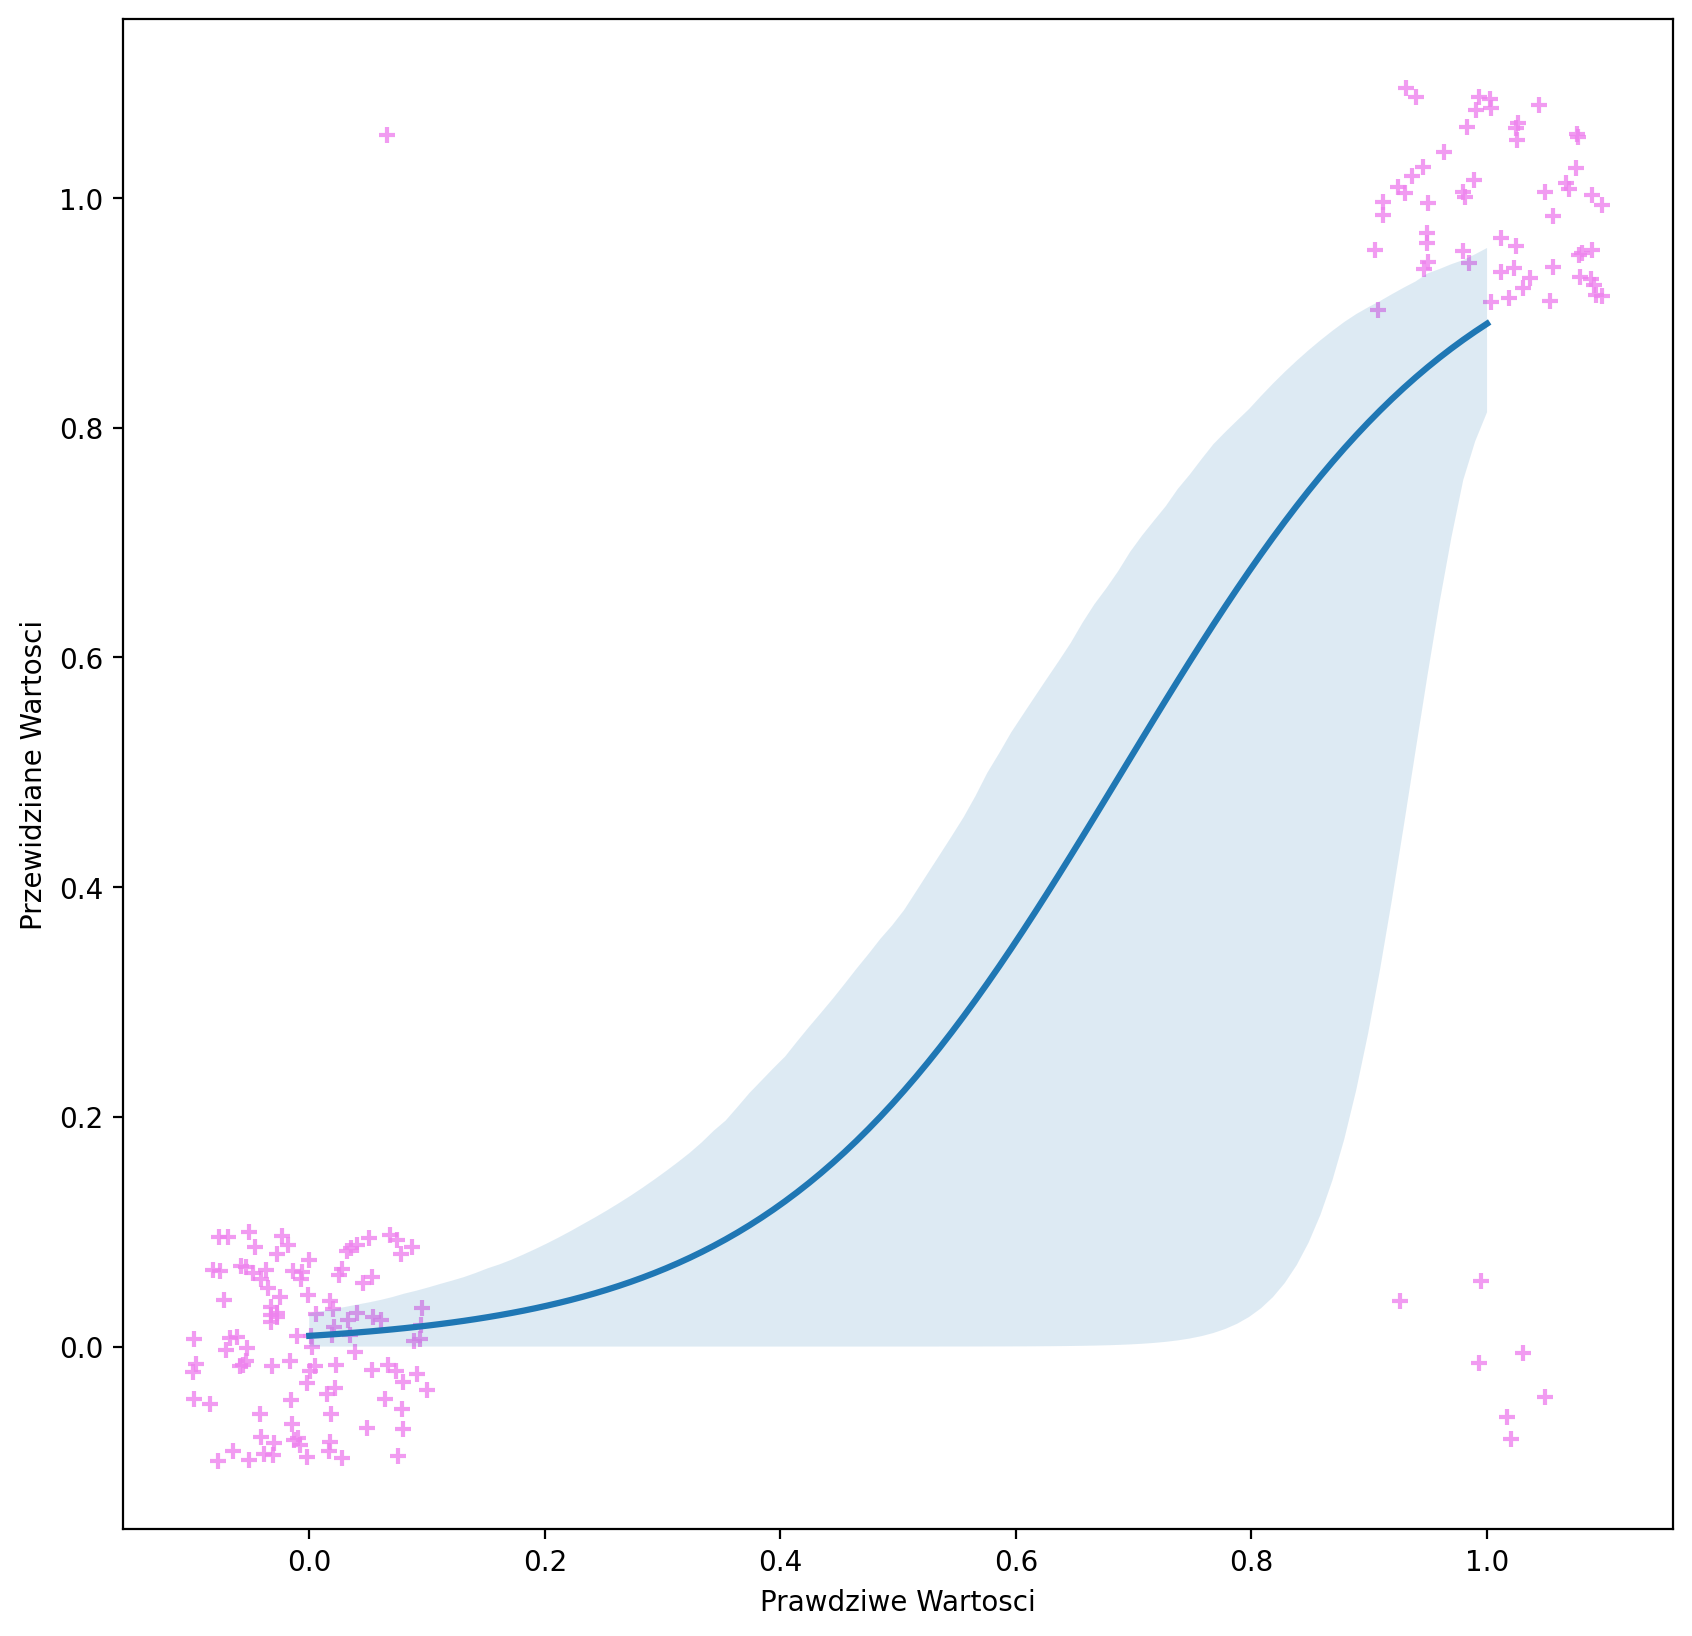

In [ ]:
# Aplikujemy Regresje Logistyczna
 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
 

# Implementujemy model regresji logistycznej
y_pred = lr.predict(X_test)
y_pred
 

# Tablica zawierajaca aktualny wynik
y_test

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

lr_acc =accuracy_score(y_test, y_pred)

results = y_test

tempResults = pd.DataFrame({'Algorithm':['Logistic Regression Method'], 'Accuracy':[lr_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results.dropna()

wspTheta0 = lr.intercept_          # jeden wspolczynnik theta 0
wspThetaPozostale = lr.coef_       # 30 wspolczynnikow theta




porownanie_wartosci = pd.DataFrame({'Prawdziwe Wartosci':y_test, 'Przewidziane Wartosci':y_pred})


figure(figsize=(10, 10), dpi=200)
sns.color_palette("magma")
ax = sns.regplot(x="Prawdziwe Wartosci", y="Przewidziane Wartosci", data=porownanie_wartosci, logistic=True, x_jitter=.1, y_jitter=.1,marker="+",scatter_kws={'color': 'violet'})

print("Dokladnosc Przewidywania= "+str(lr_acc))


# plt.savefig('RegresjaLogistyczna.png')



# Model Drzew Decyzyjnych

In [ ]:
# Aplikuj Klasyfikacje Drzew Decyzyjnych
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib.pyplot import figure

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
 
y_pred = dtc.predict(X_test)
y_pred
 
print(accuracy_score(y_test, y_pred))
 
dtc_acc = accuracy_score(y_test, y_pred)

# Zestawienie Wynikow
tempResults = pd.DataFrame({'Algorithm': ['Decision tree Classifier Method'],
                            'Accuracy': [dtc_acc]})
results = pd.concat([results, tempResults])
results = results[['Algorithm', 'Accuracy']]

results.dropna()

figure(figsize=(50, 50), dpi=200)
tree.plot_tree(dtc)


plt.savefig("DecisionTree.png")



0.8947368421052632


# Losowy Klasyfikator Lasu

0.9532163742690059


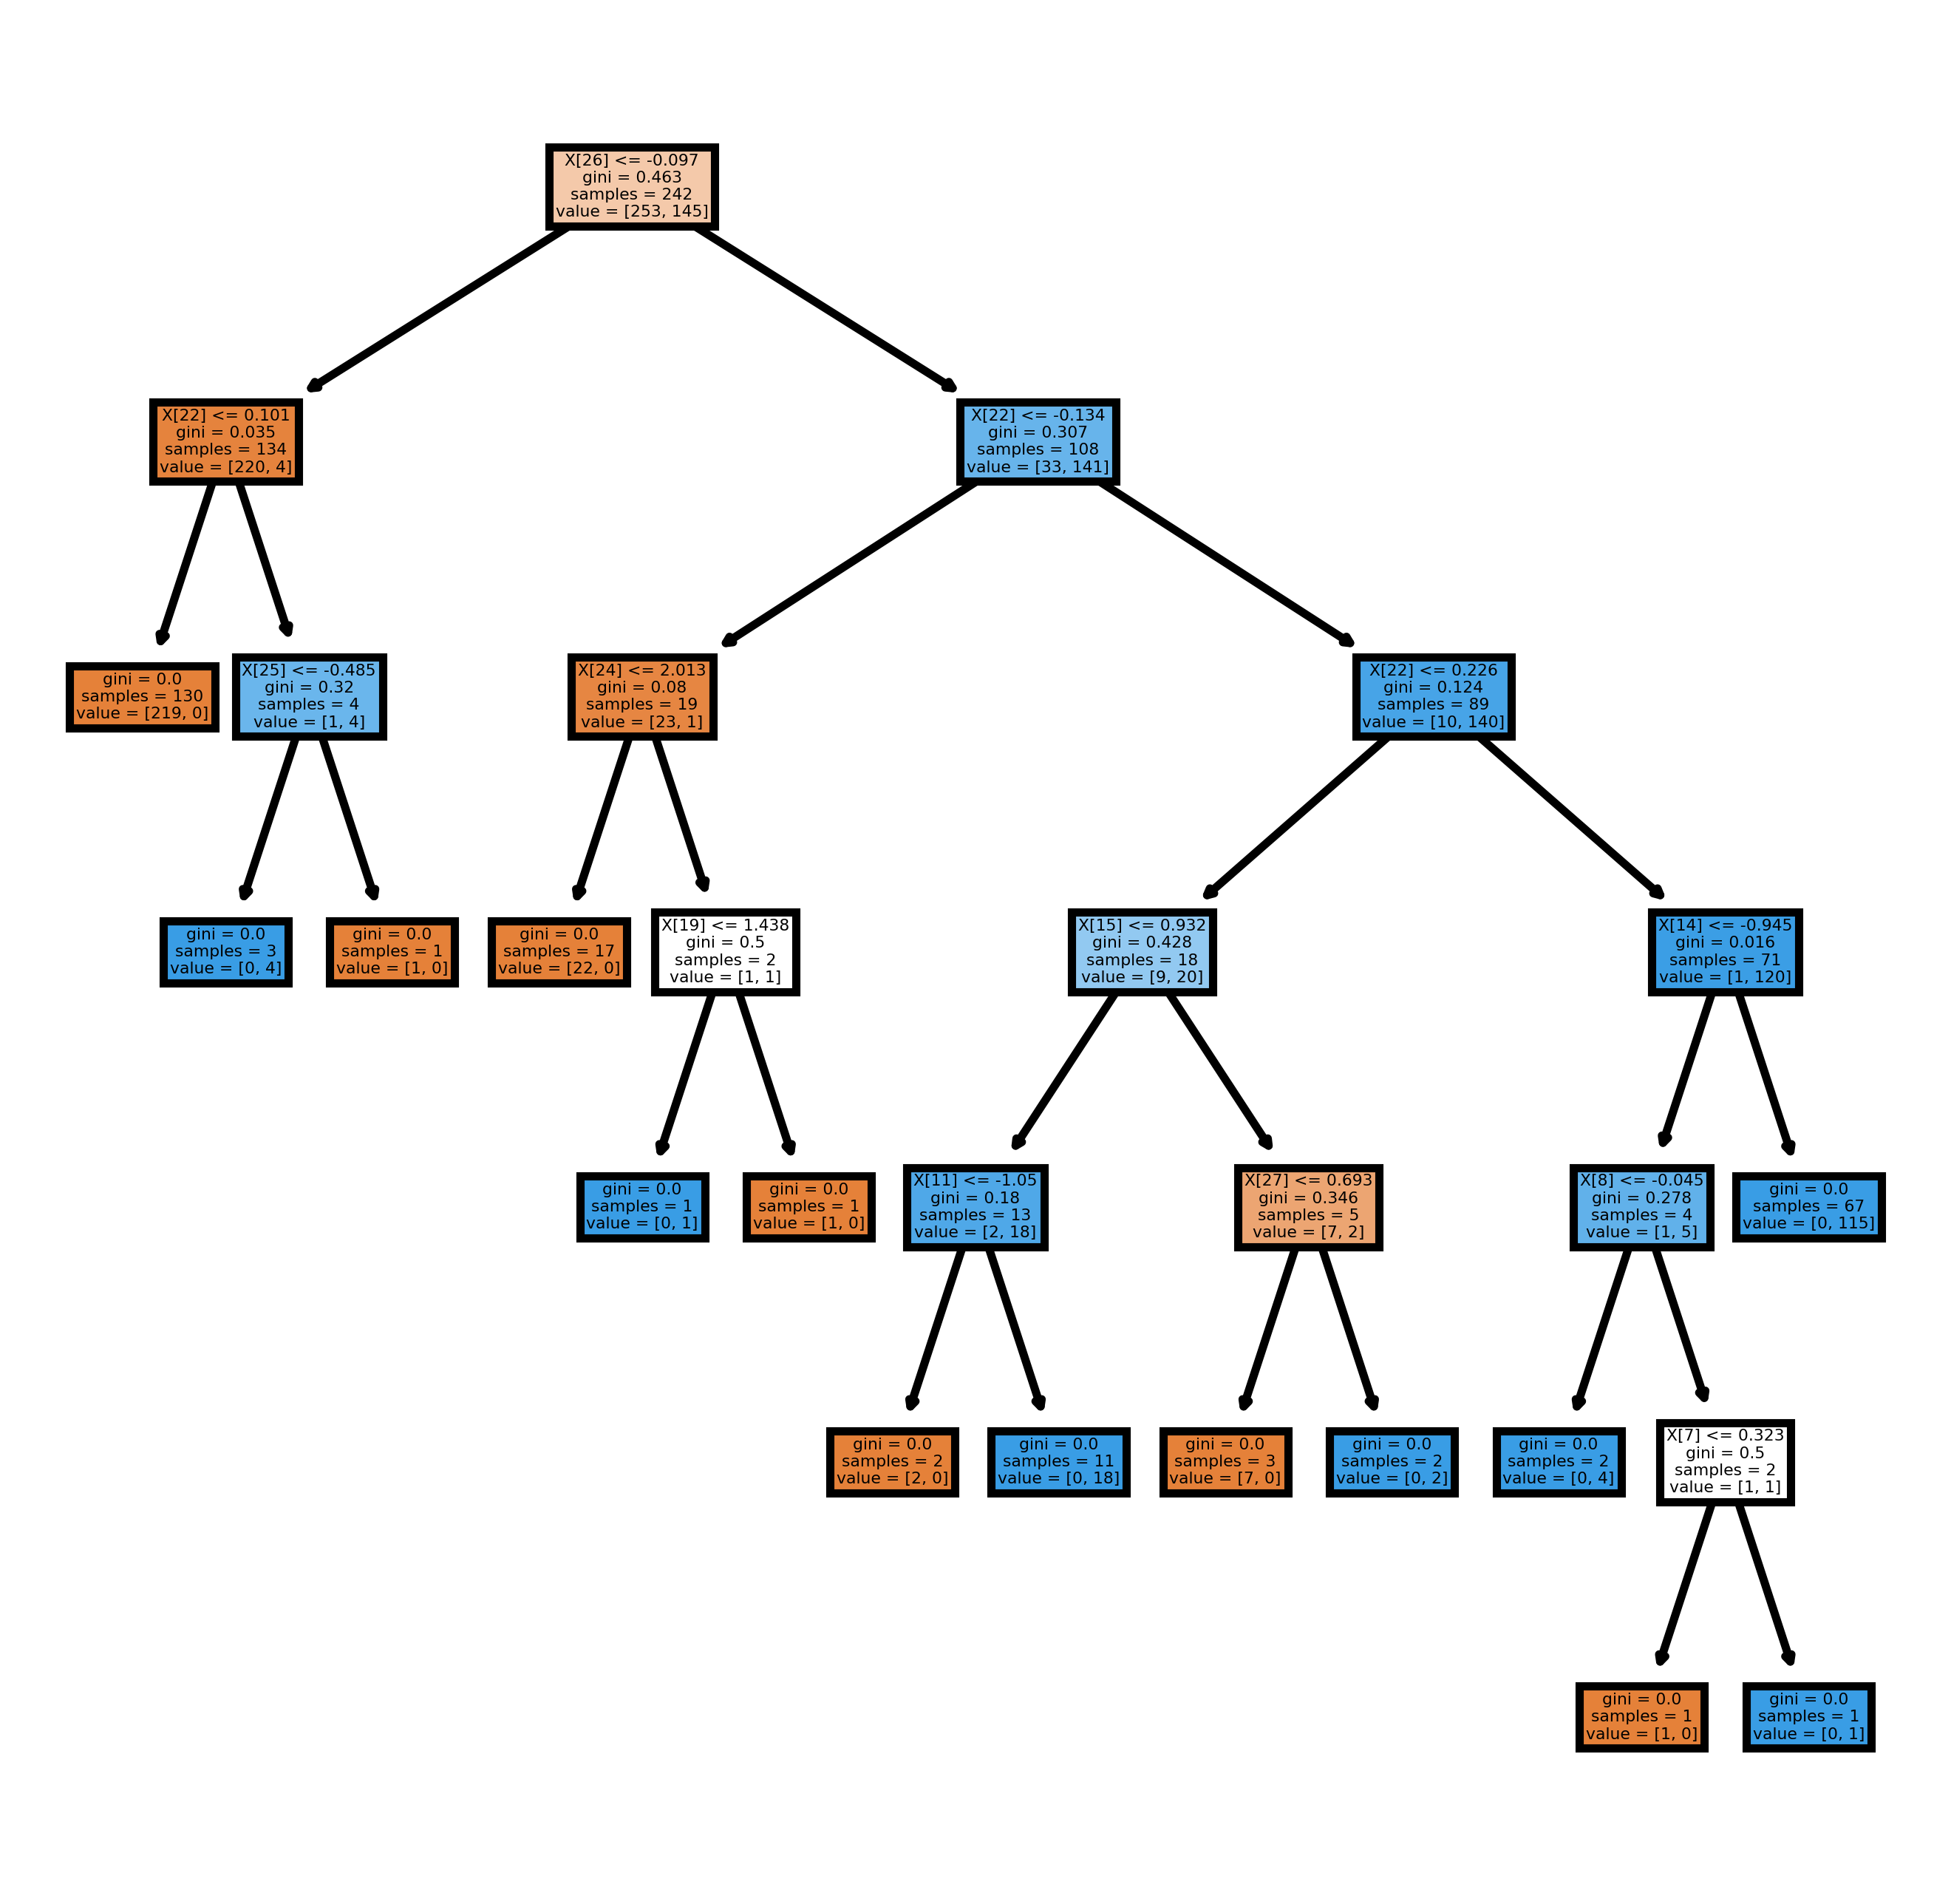

In [ ]:
# aplikujemy losowy klasyfikator lasu
# Domyslnie W Sklearn Dla Konstruktora Defaultowego mamy wybrana liczbe 100 estymatorow
#
#



from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
 
y_pred = rfc.predict(X_test)
y_pred
 
print(accuracy_score(y_test, y_pred))
 
# 
# Zestawienie
rfc_acc = accuracy_score(y_test, y_pred)

tempResults = pd.DataFrame({'Algorithm': ['Random Forest Classifier Method'],
                            'Accuracy': [rfc_acc]})
 
results = pd.concat([results, tempResults])
results = results[['Algorithm', 'Accuracy']]

results.dropna()




fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfc.estimators_[0],
               filled = True);
        
fig.savefig('jednoDrzewoLasu.png')




# Wykresy Dla Kolejnych Estymatorow

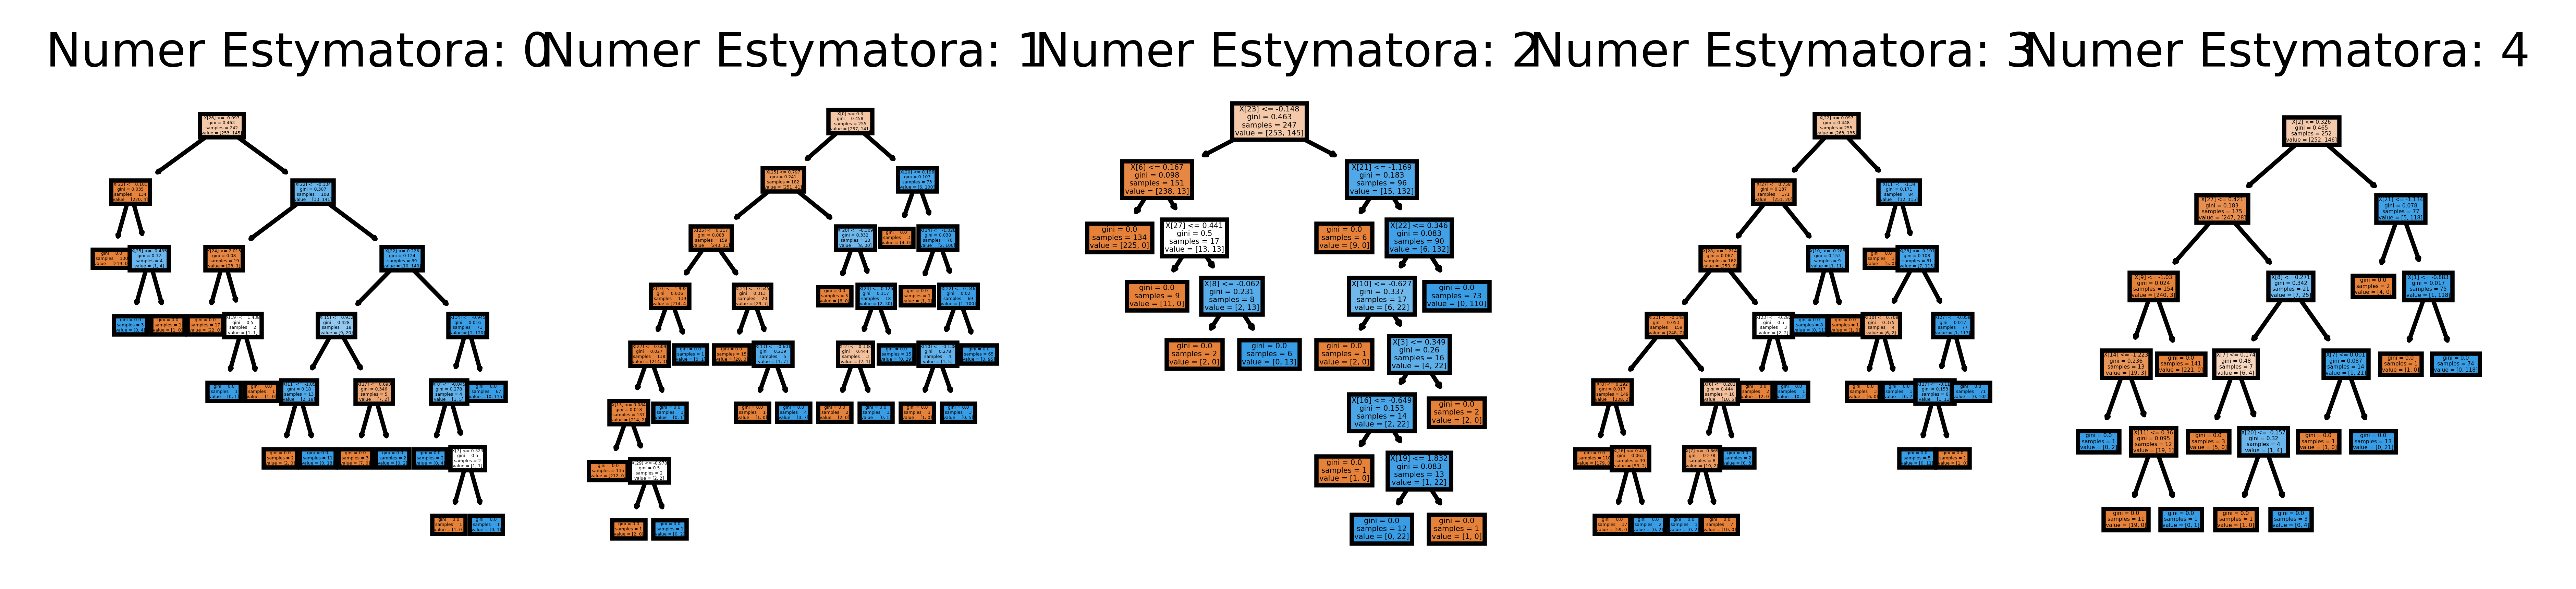

In [ ]:

fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rfc.estimators_[index], 
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title(' Numer Estymatora: ' + str(index)+" ", fontsize = 11)
#fig.savefig('rf_5trees.png')

# Support Vector Machine

In [ ]:
# aplikujemy Support Vector Machine
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train,y_train)
         
y_pred = svc.predict(X_test)
y_pred
         
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

svc_acc = accuracy_score(y_test, y_pred)

# Zestawienie
tempResults = pd.DataFrame({'Algorithm': ['Support Vector Classifier Method'],
                            'Accuracy': [svc_acc]})
results = pd.concat([results, tempResults])
results = results[['Algorithm', 'Accuracy']]
results.dropna()

0.9883040935672515


,Algorithm,Accuracy
0,Logistic Regression Method,0.988304
0,Decision tree Classifier Method,0.947368
0,Decision tree Classifier Method,0.918129
0,Random Forest Classifier Method,0.982456
0,Support Vector Classifier Method,0.988304
0,Support Vector Classifier Method,0.988304


# Wykres Powierzchnia Decyzji dla SVM

https://www.analyticsvidhya.com/blog/2020/08/plotting-decision-surface-for-classification-machine-learning-algorithms/

No handles with labels found to put in legend.


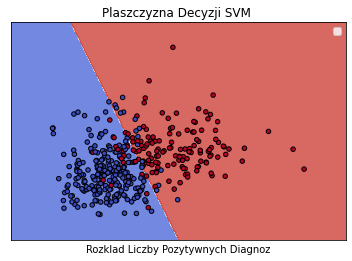

<Figure size 2000x2000 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:


X = X_train[:, :2]
y = y_train

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

fig, ax = plt.subplots()

figure(figsize=(10, 10), dpi=200)

title = ('Plaszczyzna Decyzji SVM ')

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

ax.set_xlabel('Rozklad Liczby Pozytywnych Diagnoz')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()



plt.savefig("Plaszczyzna Decyzji.png")
